In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT ="/content/drive/MyDrive"
import os
os.chdir(ROOT)

Steps for Mastering Exploratory Data Analysis

Step 1: Understand the Problem and the Data

Step 2: Import and Inspect the Data

Step 3: Handling Missing Values

Step 4: Explore Data Characteristics

Step 5: Perform Data Transformation

Step 6: Visualize Data Relationships

Step 7: Handling Outliers

Step 8: Communicate Findings and Insights

## Packages

In [43]:
pip install xgboost

In [44]:
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading and Inspecting the Data

In [10]:
# Reading dataset using pandas
df = pd.read_csv('train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [11]:
df.shape

(45593, 20)

We get to know that the dataset has **45593 rows** and **20 columns**.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

## Handling Missing Values

There are no missing values in the dataset based on the `info()` output.

However, we notice a few issues:

`Delivery_person_Age`, `Delivery_person_Ratings`, `multiple_deliveries`, and `Time_taken(min)` are of object type but should be numerical.

`Time_taken(min)` contains extra characters (e.g., `(min)`) which need to be cleaned.

In [13]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [14]:
# Clean and convert columns
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

In [15]:
# Remove "(min)" from Time_taken(min) and convert it to numeric
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract('(\d+)').astype(float)

In [16]:
# Filling missing values
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median())
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])

In [17]:
# Confirm the changes
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


## Exploring Data Characteristics

**Statistical Summary of Numerical Data**

A statistical summary provides key information about the central tendency, spread, and shape of the numerical data distribution. This can be achieved using the `describe()`
 function, which calculates statistics like:

* **Count**: Number of non-null values.

* **Mean**: Average of the data.

* **Standard deviation (std)**: Measure of the spread of the data.

* **Min/Max**: Minimum and maximum values in the column.

* **Percentiles (25%, 50%, 75%)**: Quartile values, which divide the data into four equal parts.

In [18]:
# Summary statistics for numerical columns
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.584739,4.636552,17.017729,70.231332,17.465186,70.845702,1.023359,0.750225,26.294607
std,5.696333,0.327906,8.185109,22.883647,7.335122,21.118812,0.839065,0.567430,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


**Statistical Summary of Categorical Data**

For categorical data (e.g., City, Weatherconditions, Type_of_order), it is useful to examine:

* **Unique values**: Count of unique categories.

* **Top**: Most frequent category.

* **Freq**: Frequency of the most common category.

This helps us understand the variety and frequency of categorical features.

In [19]:
# Generate summary statistics for categorical columns
df.describe(include='object')

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593
unique,45593,1320,44,177,193,7,5,4,4,3,4
top,0x4607,PUNERES01DEL01,15-03-2022,NaN,21:30:00,conditions Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,1731,496,7654,15477,11533,26435,44469,34093


#### Understanding the Distribution of Target Variable

The target variable in this dataset is the **Time_taken(min)**, which represents the delivery time.


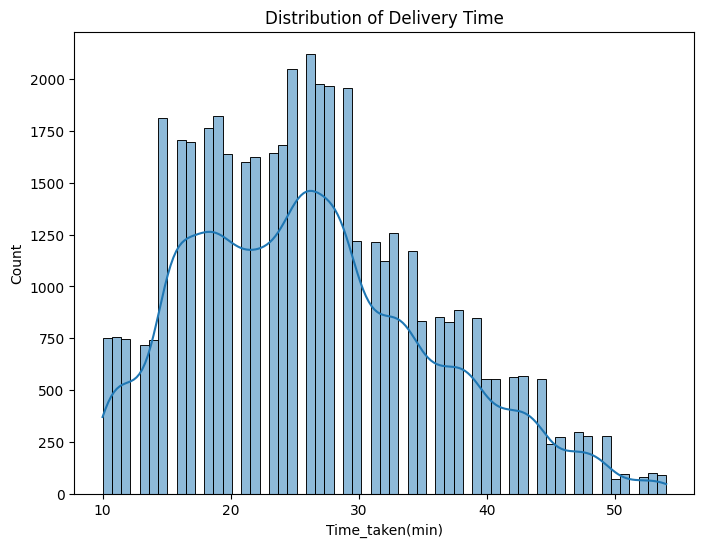

In [20]:
# Plot of the distribution of the delivery time
plt.figure(figsize=(8, 6))
sns.histplot(df['Time_taken(min)'], kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

#### Exploring the Weather Conditions

<ipython-input-21-8f8cc644a0b6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weather_counts.index, x=weather_counts.values, palette='viridis')


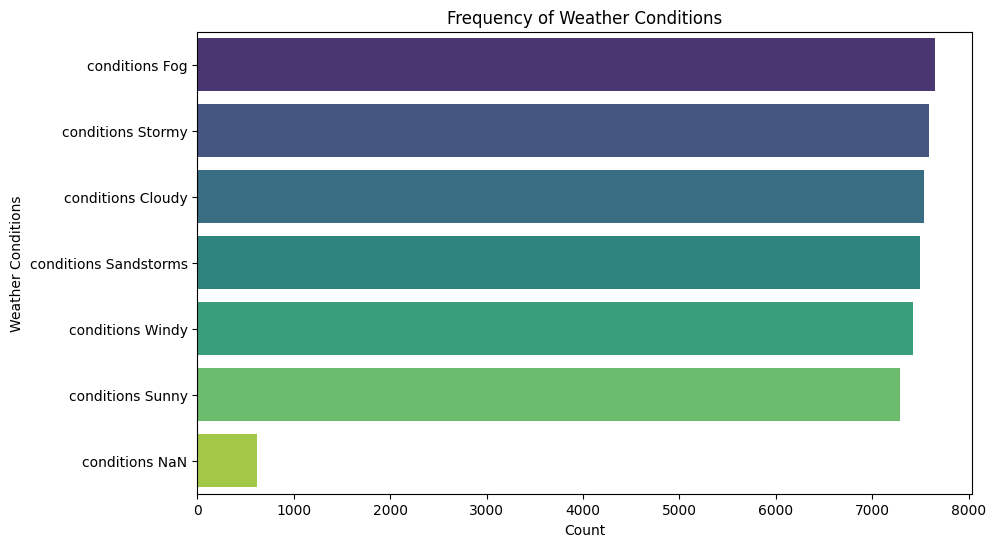

In [21]:
# Count the occurrences of each weather condition
weather_counts = df['Weatherconditions'].value_counts()

# Plot a horizontal bar plot for Weather Conditions
plt.figure(figsize=(10, 6))
sns.barplot(y=weather_counts.index, x=weather_counts.values, palette='viridis')
plt.title('Frequency of Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.show()

#### Exploring Relationships Between Features and Target Variable

**Delivery Time vs. Road Traffic Density**

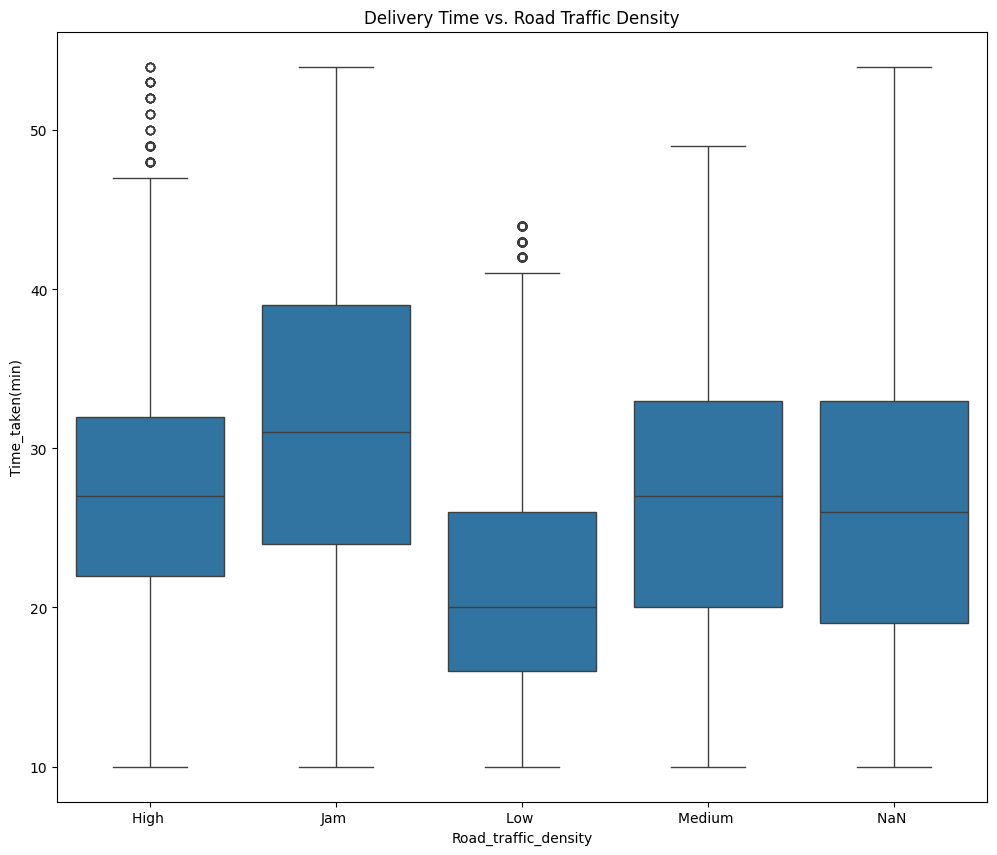

In [22]:
# Boxplot of delivery time across different traffic densities
plt.figure(figsize=(12, 10))
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=df)
plt.title('Delivery Time vs. Road Traffic Density')
plt.show()

**Delivery Time vs. Weather Conditions**

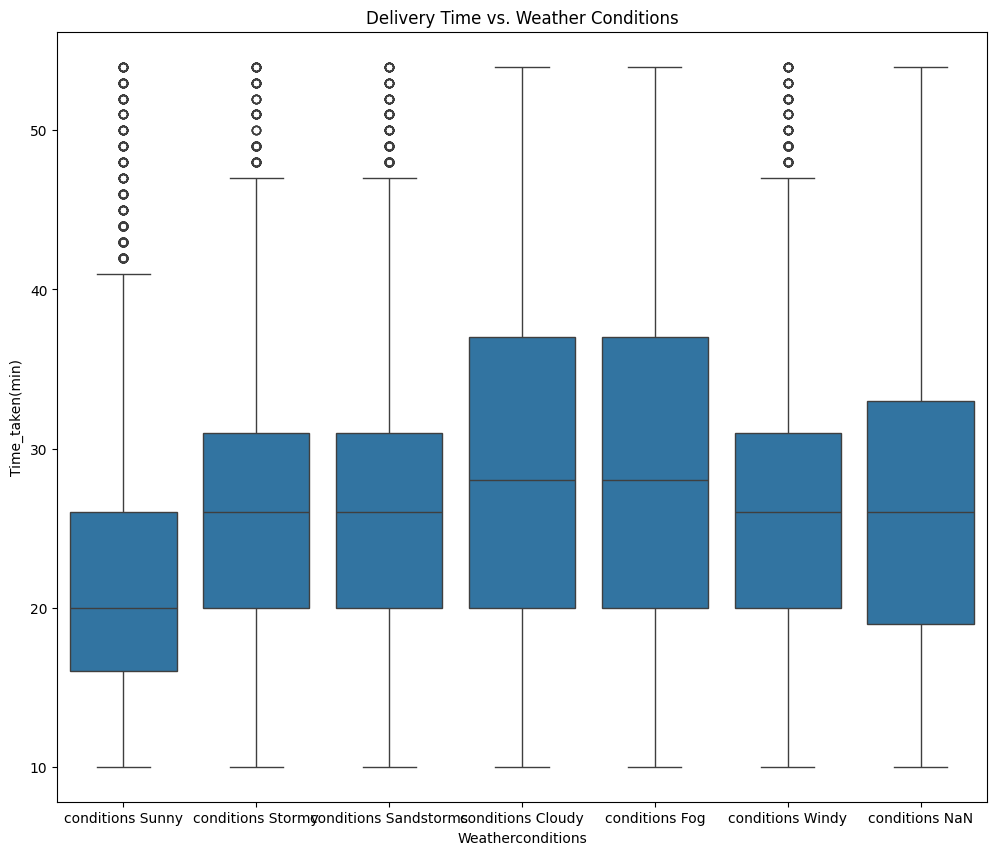

In [23]:
# Boxplot of delivery time across different weather conditions
plt.figure(figsize=(12, 10))
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=df)
plt.title('Delivery Time vs. Weather Conditions')
plt.show()

#### Checking Correlations Between Numerical Variables

In [24]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check if the filtering worked and the columns are numeric
print(numeric_df.columns)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)'],
      dtype='object')


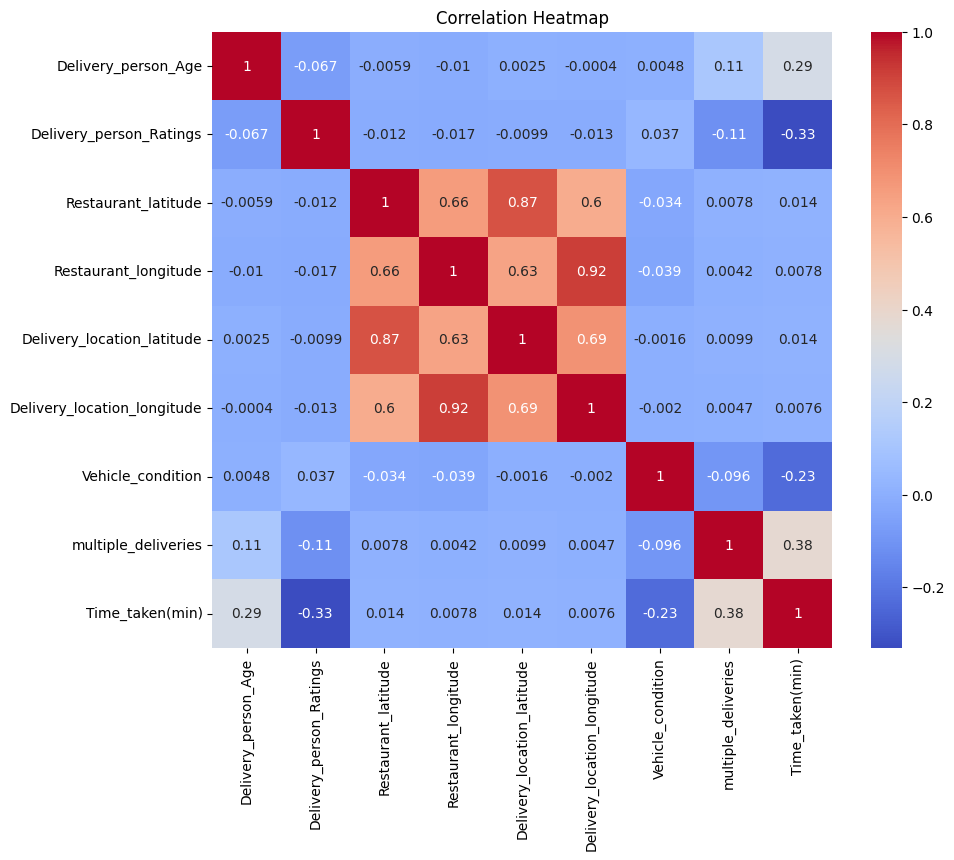

In [25]:
# Correlation matrix and heatmap for numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Examining Categorical Variables

Categorical variables such as Type_of_order, Festival, and City could have significant effects on delivery time. Analyzing the frequency distribution of these variables helps to understand their impact.

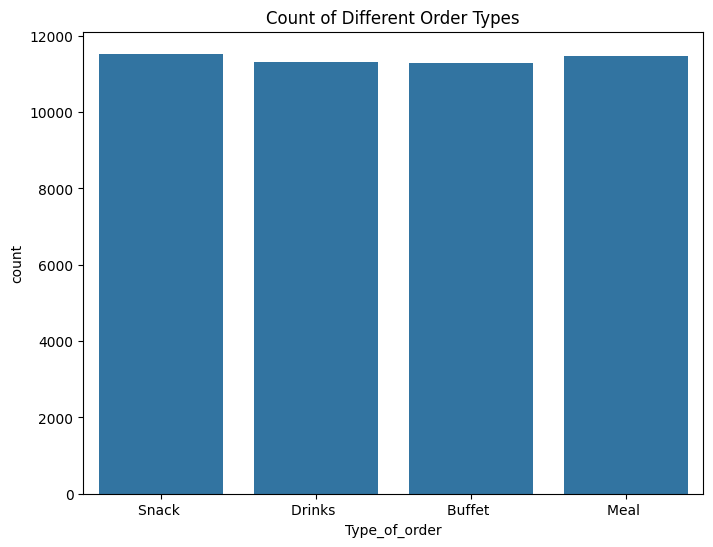

In [26]:
# Countplot of different types of orders
plt.figure(figsize=(8, 6))
sns.countplot(x='Type_of_order', data=df)
plt.title('Count of Different Order Types')
plt.show()

## Handling Outliers


Outliers can be handled by visual inspection or using statistical methods:

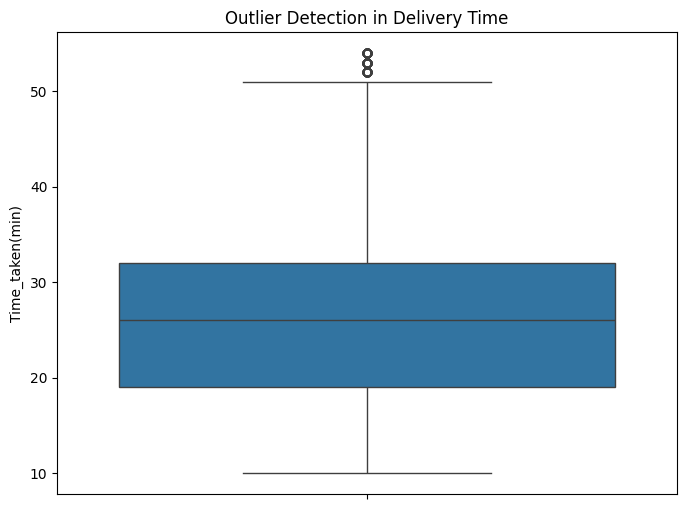

In [31]:
# Boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Time_taken(min)'])
plt.title('Outlier Detection in Delivery Time')
plt.show()

In [32]:
# Optionally, remove outliers based on IQR
Q1 = df['Time_taken(min)'].quantile(0.25)
Q3 = df['Time_taken(min)'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
df_outliers = df[((df['Time_taken(min)'] < (Q1 - 1.5 * IQR)) | (df['Time_taken(min)'] > (Q3 + 1.5 * IQR)))]

In [34]:
df_outliers.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
43,0xb796,SURRES17DEL03,37.0,4.7,21.149569,72.772697,21.239569,72.862697,04-04-2022,19:45:00,19:50:00,conditions Sandstorms,Jam,0,Snack,motorcycle,3.0,No,Metropolitian,52.0
188,0x4b5b,MYSRES04DEL03,38.0,4.3,12.308500,76.665808,12.398500,76.755808,04-04-2022,21:15:00,21:25:00,conditions Sandstorms,Jam,0,Meal,motorcycle,1.0,Yes,Semi-Urban,54.0
266,0xd92f,AGRRES03DEL01,35.0,4.9,27.160832,78.011608,27.230832,78.081608,18-02-2022,21:15:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,2.0,No,Metropolitian,53.0
641,0xc2ba,LUDHRES18DEL03,20.0,3.9,30.890184,75.829615,30.950184,75.889615,11-02-2022,20:40:00,20:45:00,conditions Sunny,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,54.0
722,0x836d,HYDRES06DEL01,31.0,4.4,17.455894,78.375467,17.525894,78.445467,25-03-2022,19:35:00,19:40:00,conditions Stormy,Jam,0,Meal,motorcycle,1.0,Yes,Metropolitian,53.0


In [35]:
df_clean = df[~((df['Time_taken(min)'] < (Q1 - 1.5 * IQR)) | (df['Time_taken(min)'] > (Q3 + 1.5 * IQR)))]

In [36]:
df_clean.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0


In [29]:
df.shape

(45593, 20)

In [37]:
df_outliers.shape

(270, 20)

In [30]:
df_clean.shape

(45323, 20)

We can see that **270 outliers** were removed!

## Model Building

In [39]:
# Selecting features and target
X = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Weatherconditions', 'Road_traffic_density', 'Type_of_order']]
y = df['Time_taken(min)']

# One-Hot Encode categorical variables (Weatherconditions, Road_traffic_density, Type_of_order)
X = pd.get_dummies(X, columns=['Weatherconditions', 'Road_traffic_density', 'Type_of_order'], drop_first=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Regression**

**Training the Linear Regression model**

In [40]:
# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

**Evaluating the Model**

In [42]:
# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 46.62991044659044
R² Score: 0.4681694640612224


#### **XGBoost**

**Training the XGBoost Regressor Model**

In [45]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

**Evaluating the model**

In [46]:
# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 33.55344045748908
R² Score: 0.6173112054003295


**XGBoost is better suited** for this problem, as it has a higher R² score and lower MSE.